In [1]:
%matplotlib widget 
import sys
sys.path.insert(0,'../')
import numpy as np

from CSR import *
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from tools import plot_surface

## Run DFCSR

In [2]:
testCSR = CSR2D(input_file= 'input/chicane_config.yaml')

start reinterpolation. number of slice 1
t_x 1.0
t_z 1.0
xbins 500
zbins 500


In [3]:
testCSR.run()

Calculating CSR at s= 0.1
--- 8.861927032470703 seconds ---
Beams written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output/chicane-2024-06-06T14_22_44-07_00-particles.h5
Wakes written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output/chicane-2024-06-06T14_22_44-07_00-wakes.h5
Finish step 2 in 9.473289251327515 seconds
Calculating CSR at s= 0.2
--- 9.614161252975464 seconds ---
Beams written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output/chicane-2024-06-06T14_22_44-07_00-particles.h5
Wakes written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output/chicane-2024-06-06T14_22_44-07_00-wakes.h5
Finish step 3 in 10.194462776184082 seconds
Calculating CSR at s= 0.30000000000000004
--- 8.547585725784302 seconds ---
Beams written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output/chicane-2024-06-06T14_22_44-07_00-particles.h5
Wakes written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output/chicane-2024-06-06T14_22_44-07_00-wakes.

## Parallel Run with MPI

In [5]:
import pyDFCSR_mpi_run

In [15]:
# input yaml file in "./input/dipole_config.yaml"
#salloc --partition milano --account ad:beamphysics -N 1 -n 10 /usr/lib64/openmpi/bin/mpirun python  -m pyDFCSR_mpi_run ./input/dipole_config.yaml
!mpirun -n 4 python  -m pyDFCSR_mpi_run.py ./input/chicane_config.yaml

/sdf/home/j/jytang/miniconda3/envs/pyDFCSR/bin/python: Error while finding module specification for 'pyDFCSR_mpi_run.py' (ModuleNotFoundError: No module named 'pyDFCSR_mpi_run')
/sdf/home/j/jytang/miniconda3/envs/pyDFCSR/bin/python: Error while finding module specification for 'pyDFCSR_mpi_run.py' (ModuleNotFoundError: No module named 'pyDFCSR_mpi_run')
/sdf/home/j/jytang/miniconda3/envs/pyDFCSR/bin/python: Error while finding module specification for 'pyDFCSR_mpi_run.py' (ModuleNotFoundError: No module named 'pyDFCSR_mpi_run')
/sdf/home/j/jytang/miniconda3/envs/pyDFCSR/bin/python: Error while finding module specification for 'pyDFCSR_mpi_run.py' (ModuleNotFoundError: No module named 'pyDFCSR_mpi_run')


## Plot output

In [20]:
from plot_from_output import DFCSR_postprocessor

DFplot = DFCSR_postprocessor(run_name = 'chicane-2024-05-31T14_32_03-07_00',
                             work_dir = '/sdf/data/ad/ard/u/jytang/pyDFCSR/chicane_output/')

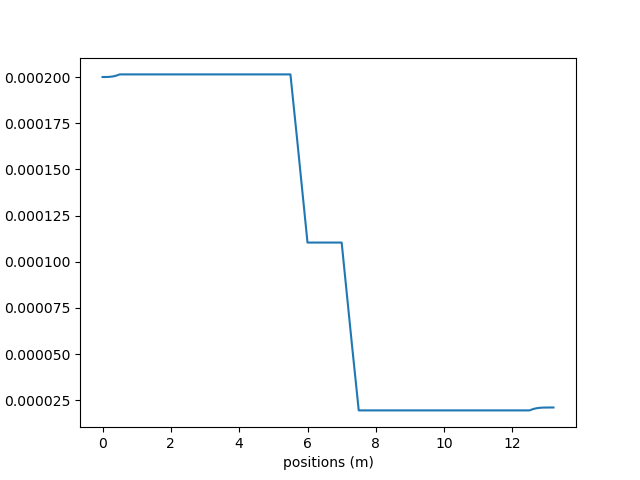

In [22]:
# Plot beam size along the lattice
DFplot.plot_stats(key = 'sigZ')

plot longitudinal wakes at nearest point s  = 7.29999999999999 m, step count 73
ebeam energy 5000000026.212385


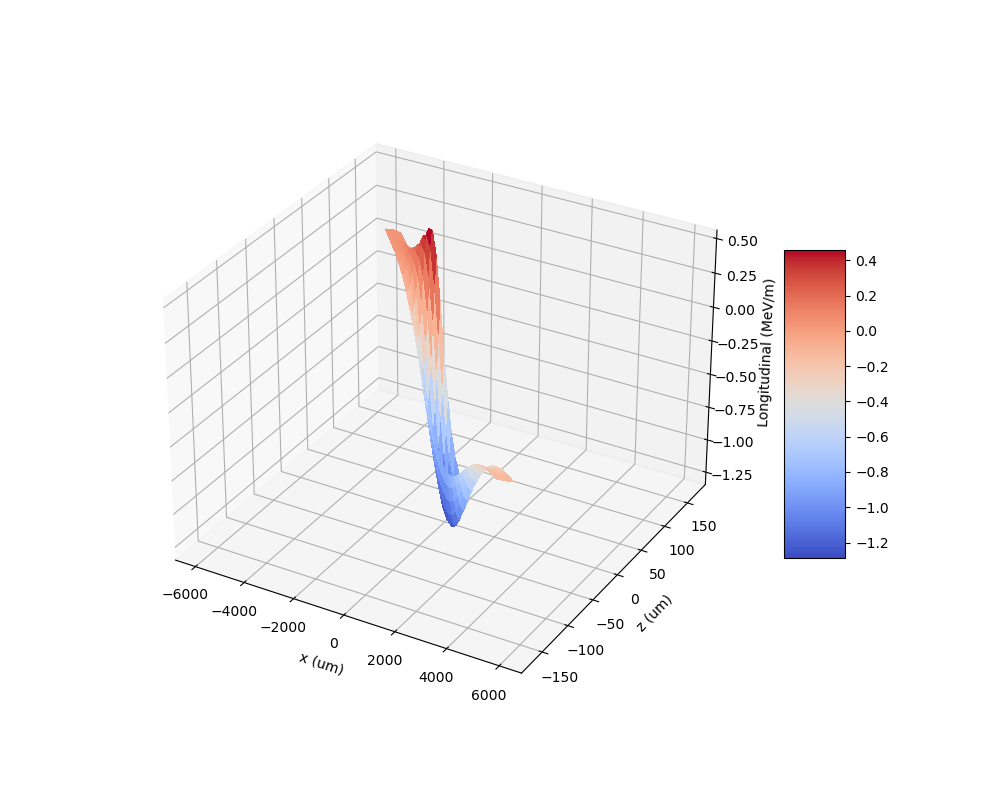

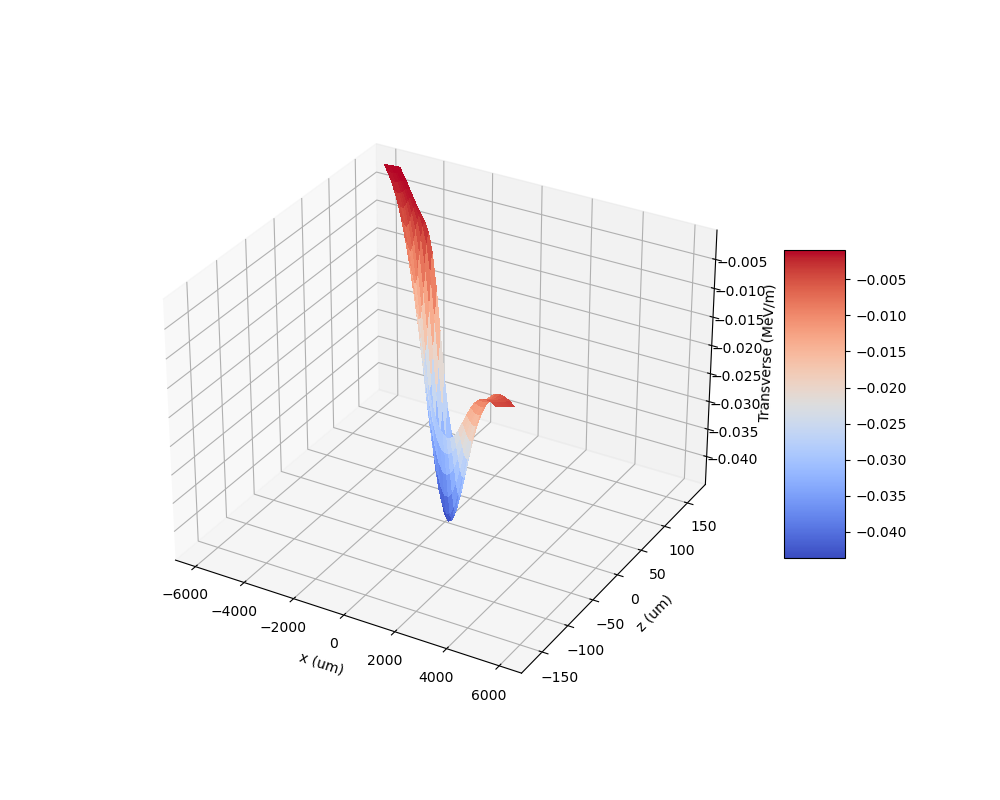

In [28]:
DFplot.plot_wakes(s = 7.25)

plot longitudinal wakes at nearest point s  = 0.6 m, step count 6


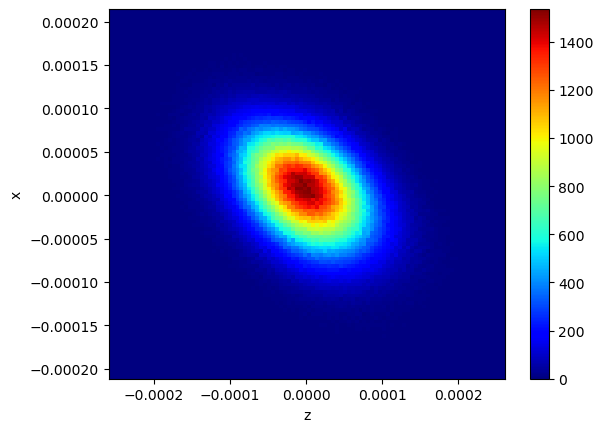

In [36]:
DFplot.plot_particles(s = 0.6, xkey = 'z', ykey = 'x')

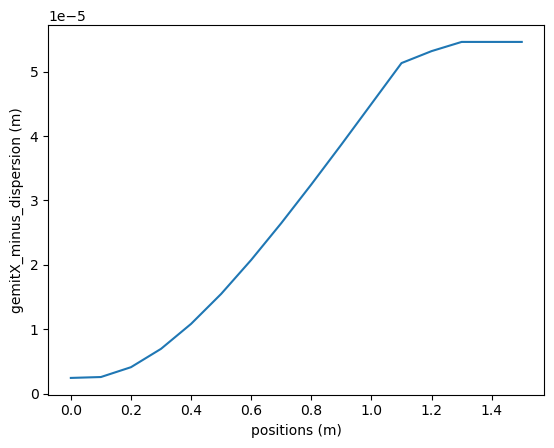

In [37]:
DFplot.plot_stats(key = 'gemitX_minus_dispersion')